In [1]:
#Import the required Libraries
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Boston Housing DataSet from scikit-learn
from sklearn.datasets import load_boston


In [3]:
boston_dataset = load_boston()

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#The target values is missing from the data. Create a new column of target 
#values and add it to dataframe
boston['MEDV'] = boston_dataset.target

In [8]:
boston.head()
#

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#Data preprocessing (EDA)

In [10]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


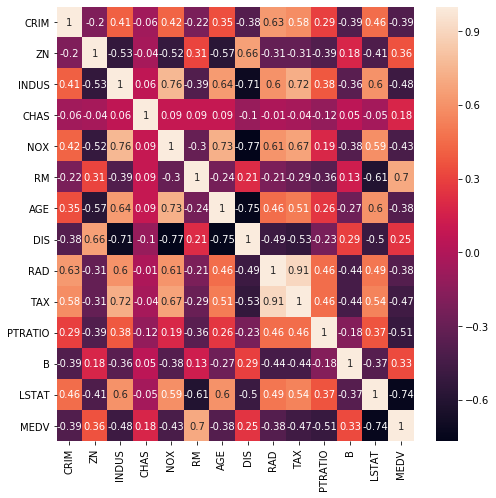

In [12]:
#Correlation matrix  : inbuilt function corr()
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [13]:
'''Observations
From the above coorelation plot we can see that MEDV(target means dependent 
variables)is strongly correlated to LSTAT, RM (independent features/columns)
'''

'Observations\nFrom the above coorelation plot we can see that MEDV(target means dependent \nvariables)is strongly correlated to LSTAT, RM (independent features/columns)\n'

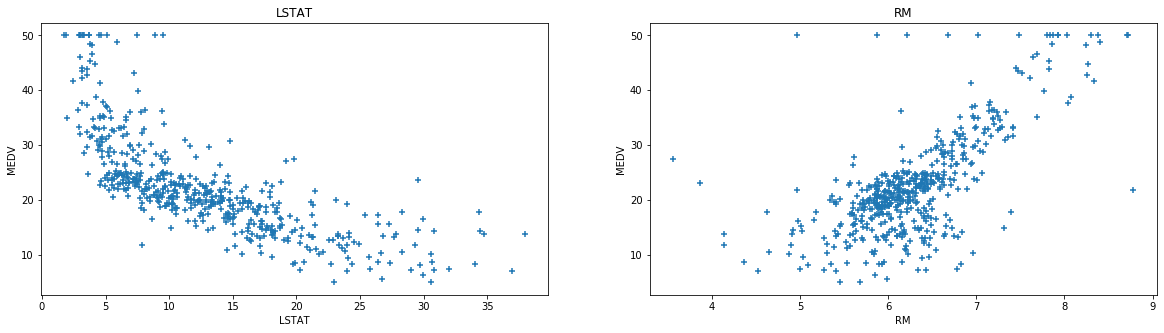

In [14]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM'] #independent variables X
target = boston['MEDV'] #dependent variables Y

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='+')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

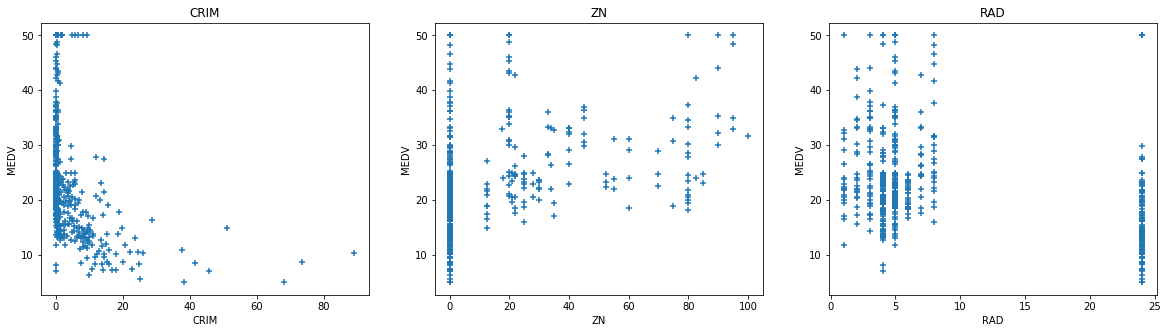

In [15]:
plt.figure(figsize=(20, 5))

features = ['CRIM', 'ZN','RAD'] #independent variables X
target = boston['MEDV'] #dependent variables Y

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='+')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [16]:
boston.shape

(506, 14)

In [ ]:
#Prepare the data for training

In [17]:
X=boston[["LSTAT","RM"]]  #independent variables means input variables always 2D array [[]]
Y = boston['MEDV']  #dependent variable means target variable which is predict always 1 D array [ ]

In [18]:
#Split the data into training and testing sets
#call train_test_split class
from sklearn.model_selection import train_test_split

In [20]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [21]:
print(X_train)

     LSTAT     RM
42    5.81  6.169
58    6.86  6.145
385  30.81  5.277
78   12.34  6.232
424  17.16  5.565
160   5.50  6.250
185  13.15  6.153
101   7.67  6.781
268   3.16  7.470
173   9.04  6.416
428  21.52  6.193
306   6.47  7.420
258   7.79  7.333
192   2.87  7.178
339   9.74  5.985
18   11.69  5.456
40    1.98  7.024
267   7.44  8.297
328   9.97  5.868
454  18.71  6.728
41    4.84  6.770
361  14.19  6.251
289   9.51  6.565
498  12.92  6.019
293   8.58  6.127
502   9.08  6.120
172  14.69  5.572
80    5.29  6.727
46   14.15  5.786
318  10.36  6.382
..     ...    ...
68   13.09  5.594
50   13.45  5.963
398  30.59  5.453
413  20.08  5.155
156  16.14  5.272
252   3.53  6.957
395  17.12  6.471
468  18.13  5.926
402  20.31  6.404
357  13.27  6.395
254   6.57  6.108
276   6.05  7.267
178   6.92  6.860
281   4.59  6.968
390  17.11  5.713
237   4.73  7.358
71    9.88  5.961
460  16.42  6.701
129  18.34  5.637
144  29.29  4.903
448  18.13  6.185
335   8.01  6.037
133  15.03  5.822
203   3.81

In [23]:
print(X_test)

     LSTAT     RM
307   7.53  6.849
343   7.18  6.696
47   18.80  6.030
67    8.10  5.878
362  10.19  5.362
132  11.12  6.372
292   4.70  6.630
31   13.04  6.072
218  17.92  5.951
90    8.81  6.417
481   7.74  6.750
344   4.61  6.874
119  13.61  5.731
66   10.24  5.787
312  11.72  6.023
407  12.13  5.608
376  23.24  6.649
225   4.63  8.725
201   7.43  6.162
147  29.53  4.926
315  11.50  5.705
146  16.65  5.628
314   9.28  6.567
324   6.12  6.415
65    4.67  6.290
425  24.39  5.896
34   20.34  6.096
345  10.53  6.014
261   7.26  7.520
389  20.85  5.390
..     ...    ...
366  14.00  4.963
29   11.98  6.674
107  14.09  6.127
483  10.42  5.762
370   2.96  7.016
285   8.23  6.453
159   7.39  6.510
291   3.56  7.148
128  15.39  6.431
117  10.30  6.021
189   5.39  7.185
435  23.27  6.629
350   5.98  6.490
298   4.97  6.345
449  19.31  6.417
325   5.08  6.431
497  14.10  5.794
135  16.96  6.335
503   5.64  6.976
257   5.12  8.704
491  18.07  5.983
6    12.43  6.012
427  14.52  6.202
11   13.27

In [24]:
#Train the model using sklearn LinearRegression
#call LinearRegression
from sklearn.linear_model import LinearRegression

In [25]:
#create a object of LinearRegression class
lr=LinearRegression() #lr user defined object of LinearRegression class

In [26]:
#fit() inbuilt function of LinearRegression class which is used for train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
#show slope means coefficient then use inbuilt method coef_
lr.coef_

array([-0.65930795,  4.5389694 ])

In [28]:
#show intercept then use inbuilt method intercept_
lr.intercept_

2.49341452770517

In [34]:
# model evaluation for training set 
#predict() inbuilt function of LinearRegression 
y_predict=lr.predict(X_test)


In [30]:
m1=-0.65930795
m2=4.5389694
b=2.49341452770517
mdev_pred=m1*7.53+m2*6.849+b

In [31]:
mdev_pred

28.61622708480517

In [35]:
#calculate mean squared error sum of(original price-predicted price)^2/no. of datapoints
from sklearn.metrics import mean_squared_error

In [38]:
m=mean_squared_error(Y_test,y_predict)
print(m)

32.08375607139391


In [39]:
#Root mean squared error formula :  squareroot of MSE
rmse=np.sqrt(m)

In [40]:
print(rmse)

5.6642524724268695


In [43]:
#final find out R2-score (0-1)
from sklearn.metrics import r2_score

In [44]:
r2_score(Y_test,y_predict) #r2_score() inbuilt function 

0.6753556251471677

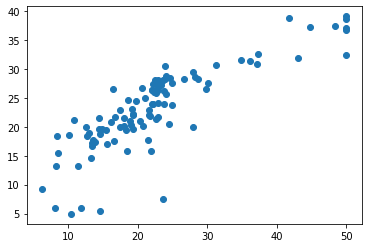

In [47]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_predict)
plt.show()